In [1]:
#Cars Data..
#Linear Regression..

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
warnings.filterwarnings('ignore')

In [4]:
os.chdir('D:/4th Semester/DATA SCIENCE/Python_Dataset')

In [5]:
price_prdt_df = pd.read_csv('Cars_Data.csv')

In [6]:
price_prdt_df.sample(15)

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
128,Honda CB Hornet 160R,2017,0.870,3000,Petrol,Individual,Manual,0,0.80
144,Bajaj Pulsar NS 200,2014,0.990,25000,Petrol,Individual,Manual,0,0.60
146,Hero Extreme,2014,0.787,15000,Petrol,Individual,Manual,0,0.55
113,Mahindra Mojo XT300,2016,1.400,35000,Petrol,Individual,Manual,0,1.15
184,Bajaj Pulsar 150,2008,0.750,26000,Petrol,Individual,Manual,1,0.25
239,eon,2012,4.430,23709,Petrol,Dealer,Manual,0,2.00
300,brio,2016,5.900,5464,Petrol,Dealer,Manual,0,5.30
116,Royal Enfield Classic 350,2013,1.470,33000,Petrol,Individual,Manual,0,1.10
225,i10,2011,4.600,22517,Petrol,Dealer,Manual,0,2.70
218,verna,2014,9.400,45078,Petrol,Dealer,Manual,0,6.45


# Inference
This dataset contains information about used cars.

This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression
in Machine Learning.

The columns in the given dataset are as follows:

Selling_Price: Dependent variable.This attribute refers to the price at which the vehicle is listed or sold.

Car_Name: This attribute contains the names/the model name of cars.

Year: This attributes contains the years in which the car has been manufactured.

Kms_driven: This attribute represents the total distance traveled by the vehicle in kilometers.

Fuel_Type: The type of fuel the car uses (e.g., gasoline, diesel, electric).

Seller_Type: This attribute indicates the type of seller or entity that is selling the car.

Transmission: This attribute describes the type of transmission system that the vehicle is equipped with.

Owner: This attribute typically indicates the number of previous owners or the ownership history of the
vehicle.

In [7]:
print('DataFrame Shape:',price_prdt_df.shape)

DataFrame Shape: (301, 9)


# Inference
The new dataframe consists of 301 rows and 9 columns.


In [8]:
price_prdt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Inference
Output displays the total 9 Data columns starting with the index value 0,total there are 301 entires(rows),
Data type of each column is displayed, i.e total there are dtypes: float64(2), int64(3), object(4). It also shows
there are no null values.


In [9]:
price_prdt_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0


# Inference
The output displays table with rows representing each numerical column's statistics i,e columns representing
count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values
for each column. We can find that the Selling_price minimum is 0.10 maximum is 35.0, and standard
deviation is slightly higher than the mean, it means that the data points are not relatively close to the mean
value(There is a spread).There are few outliers in the dataset. Count for all the attributes is 301, hence there
are no missing values.

In [10]:
price_prdt_df.isna().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

# Inference
The output depicts that there are no missing values in the any of the attributes of the dataframe. And the
datatype of the all attributes is int64.

In [11]:
print(price_prdt_df['Fuel_Type'].unique())
print('\n')
print(price_prdt_df['Seller_Type'].unique())
print('\n')
print(price_prdt_df['Transmission'].unique())
print('\n')
print(price_prdt_df['Owner'].unique())
print('\n')
print(price_prdt_df['Year'].unique())

['Petrol' 'Diesel' 'CNG']


['Dealer' 'Individual']


['Manual' 'Automatic']


[0 1 3]


[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


# Inference

The output displays list of unique car names present in the 'Car_Name' column of the DataFrame, such as
ritz,swift and so on. list of unique fuel types present in the 'Fuel_Type' column such as Petrol,Diesel,CNG.
list of unique seller types present in the 'Seller_Type' column such as Dealer,Individual. list of unique
transmission types present in the 'Transmission' column such as Manual,Automatic. list of unique Owner
types present in the 'Owner' column list of unique years present in the 'Year' column


In [12]:
print(price_prdt_df.Fuel_Type.value_counts())
print('\n')
print(price_prdt_df.Seller_Type.value_counts())
print('\n')
print(price_prdt_df.Transmission.value_counts())
print('\n')
print(price_prdt_df.Owner.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


Manual       261
Automatic     40
Name: Transmission, dtype: int64


0    290
1     10
3      1
Name: Owner, dtype: int64


# Inference
The output display the count of each unique fuel type,Seller Type,Transmission, Owner present in the
'Fuel_Type','Seller_type','Transmission','Owner' column of the DataFrame. This can provide valuable
insights into the distribution of above attributes data among the cars in the dataset. For an instance in
'Fuel_Type' attributes there are 239 cars which are using petrol as fuel , 60 cars using Diesel as fuel and 2
cars using CNG as fuel.

In [13]:
# encoding fuel type column
price_prdt_df.replace({"Fuel_Type": {"Petrol":0, "Diesel":1, "CNG":2,"LPG":3}}, inplace=True)
# encoding seller type column
price_prdt_df.replace({"Seller_Type": {"Dealer":0, "Individual":1}}, inplace=True)
# encoding transmission column
price_prdt_df.replace({"Transmission": {"Manual":0, "Automatic":1}}, inplace=True)

# Inference
The output display the count of each unique fuel type,Seller Type,Transmission, Owner present in the
'Fuel_Type','Seller_type','Transmission','Owner' column of the DataFrame. This can provide valuable
insights into the distribution of above attributes data among the cars in the dataset. For an instance in
'Fuel_Type' attributes there are 239 cars which are using petrol as fuel , 60 cars using Diesel as fuel and 2
cars using CNG as fuel.

In [14]:
print("Fuel Type = ", pd.unique(price_prdt_df["Fuel_Type"]))
print("Seller Type = ", pd.unique(price_prdt_df["Seller_Type"]))
print("Transmission = ", pd.unique(price_prdt_df["Transmission"]))

Fuel Type =  [0 1 2]
Seller Type =  [0 1]
Transmission =  [0 1]


# Inference
The output shows the unique values of the attributes 'Fuel_Type','Seller_Type', 'Transmission','Owner' after
the replacement of the categorial values into numeric value for specific attributes Unique values for
Fuel_Type,Seller_Type,Transmission.

In [15]:
price_prdt_df.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Kms_Driven'}>],
       [<Axes: title={'center': 'Fuel_Type'}>,
        <Axes: title={'center': 'Seller_Type'}>,
        <Axes: title={'center': 'Transmission'}>],
       [<Axes: title={'center': 'Owner'}>,
        <Axes: title={'center': 'Selling_Price'}>, <Axes: >]],
      dtype=object)

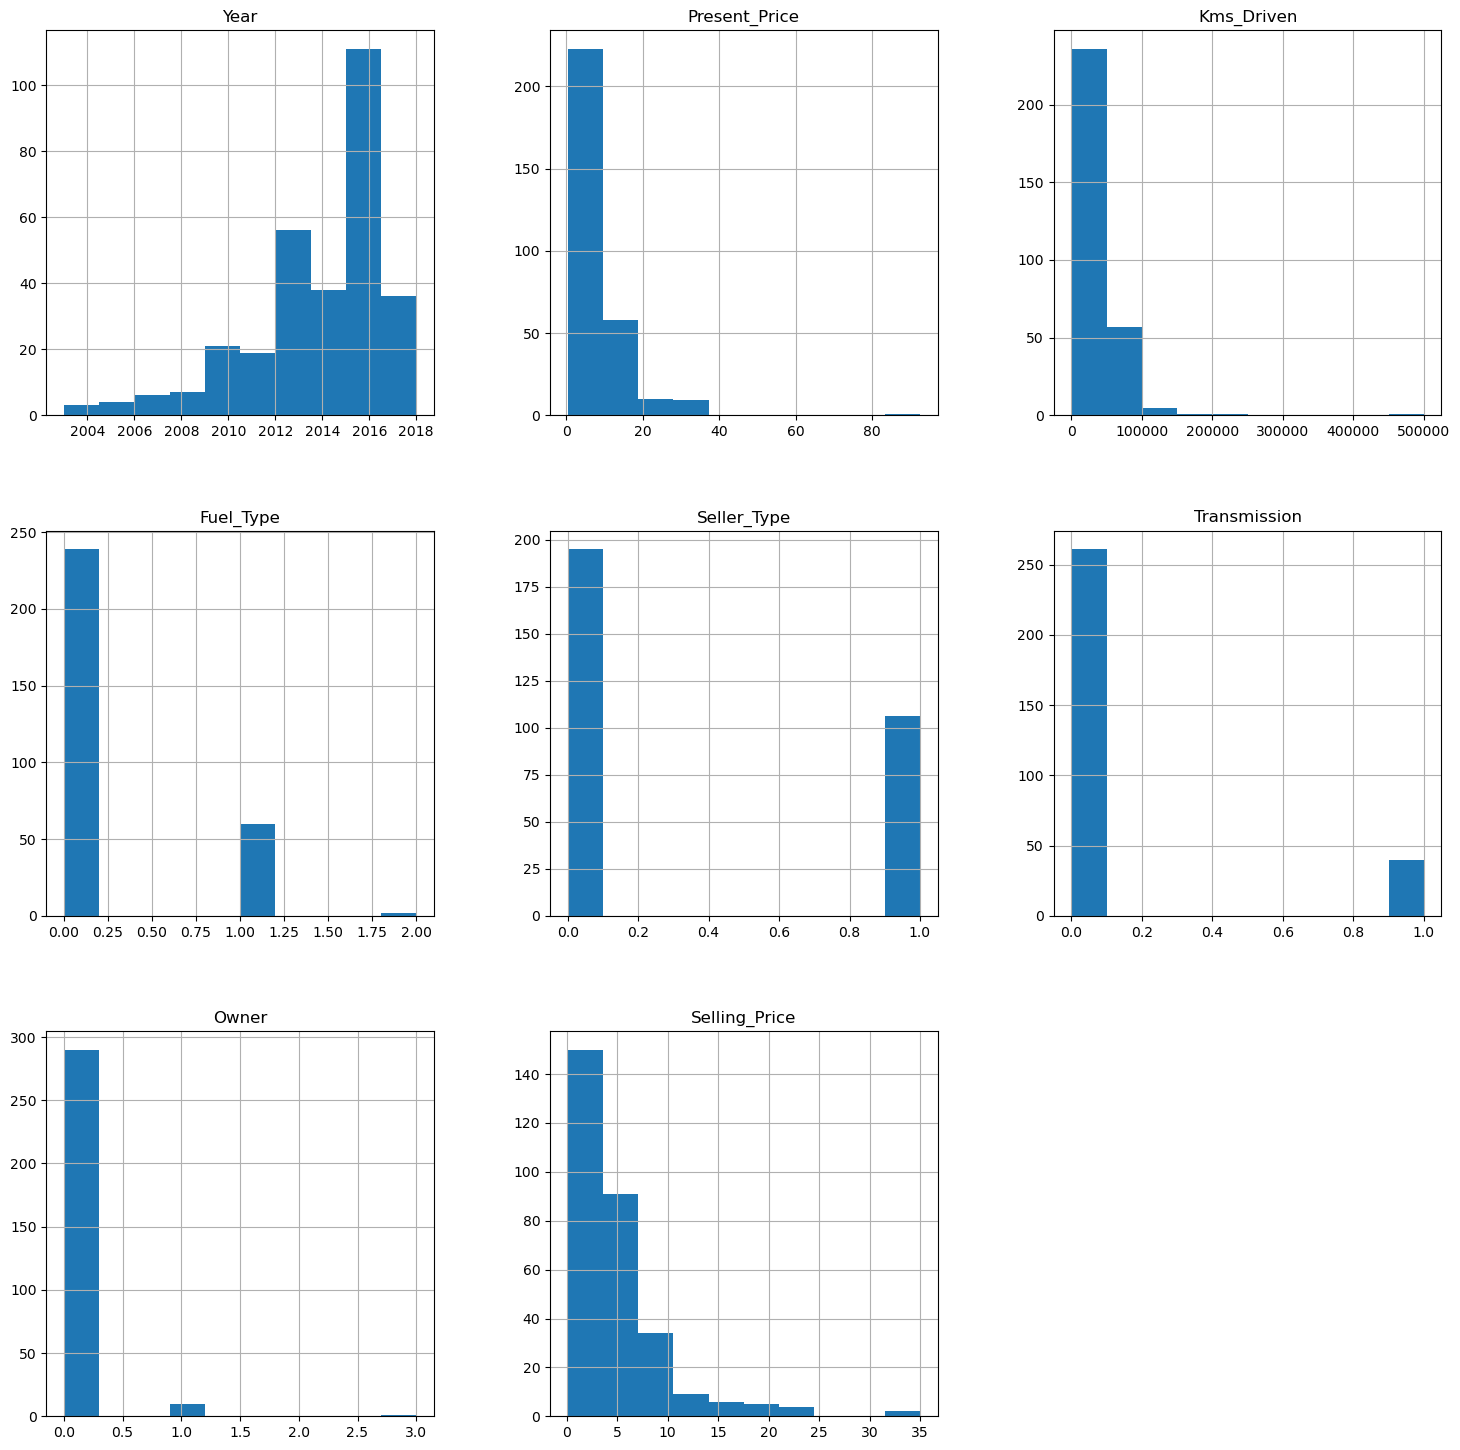

In [16]:
price_prdt_df.hist(figsize=(18,18))

# Inference
Histograms is generated to visualize the distribution of the selected attributes from the price_prdt_df,
providing insights into their data distribution and patterns. By looking at the histograms, it is observed that
distribution of data for each numerical variable. And few columns such as Kms_driven,Selling_Price and
Present price are right skewed (leaning to one side), which represent it has outliers.where as 'Year' column
has positive deviation


<Axes: xlabel='Selling_Price', ylabel='Density'>

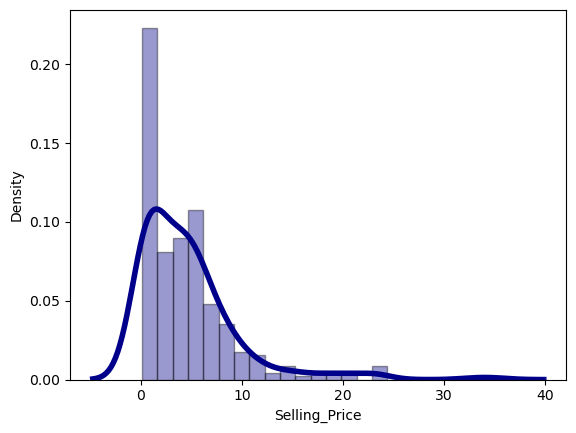

In [17]:
sns.distplot(price_prdt_df['Selling_Price'],hist=True,kde=True,
             color='darkblue', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

# Inference
The above graph is right skewed data distribution of the attribute 'Selling_Price' Outliers might be visible as
isolated peak in the plot. The histogram gives an idea of how the data is distributed in terms of frequency in
different price ranges.

In [18]:
#Relation of selling price(dependent variable) with independent variables:

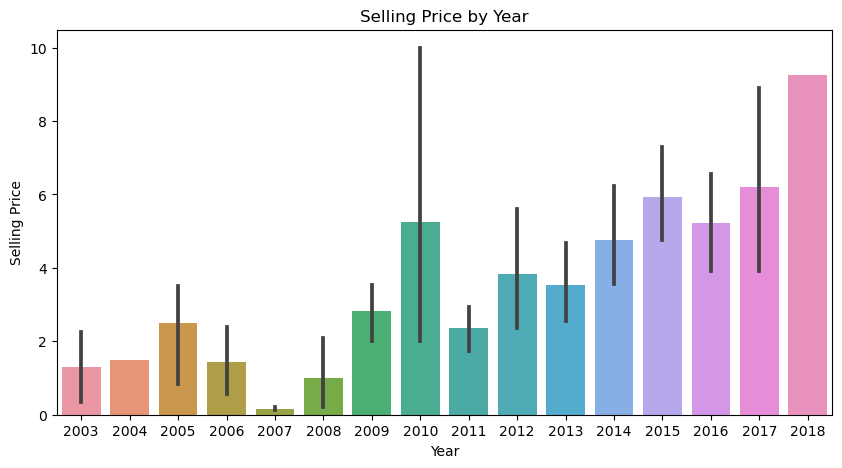

In [19]:
# Year
plt.figure(figsize=(10,5))
sns.barplot(x='Year',y='Selling_Price',data=price_prdt_df)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Selling Price by Year')
plt.show()

# Inference
It is bar plot plotted between the input varible attributes "Year" and output variable "Selling_Price".which
depicts that cars which are manufactured in 2018 have the high selling price,where as cars manufactured in
2007 have least selling price.


<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

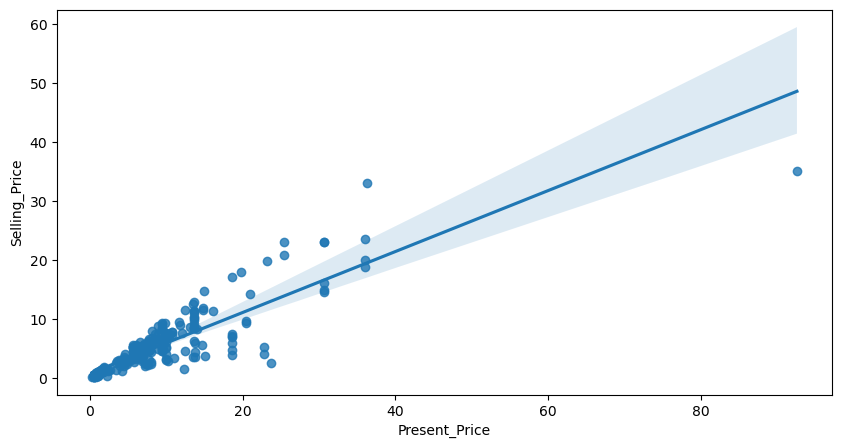

In [20]:
# Present Price 
plt.figure(figsize=(10,5))
sns.regplot(x='Present_Price',y='Selling_Price',data=price_prdt_df)

# Inference
The output depicts the resulting scatter plot provide visual insights into the linear relationship between
'Selling_Price' and 'Present_Price'. It allows to assess the direction, strength, and potential outliers in this
relationship. Here as the Present_Price incerases Selling _Price also increases,hence there is a linear
relationship between Selling_Price and 'Present_Price'.

<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

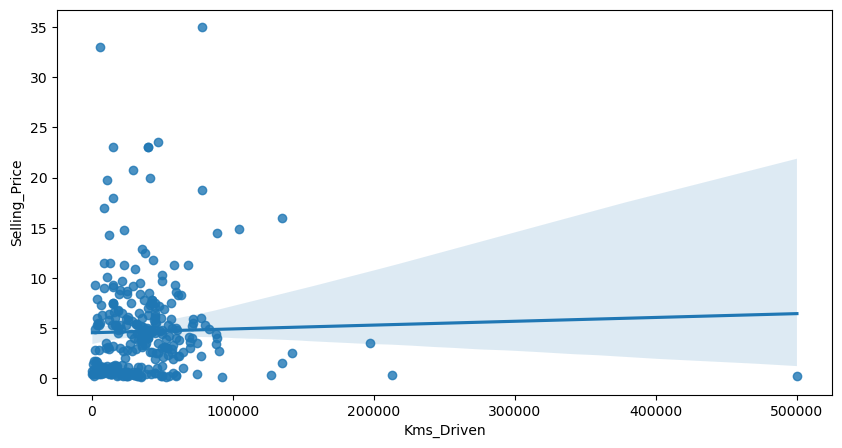

In [21]:
# Kms_Driven 
plt.figure(figsize=(10,5))
sns.regplot(x='Kms_Driven',y='Selling_Price',data=price_prdt_df)

# Inference
The output depicts the resulting scatter plot provide visual insights into the linear relationship between
'Selling_Price' and 'Present_Price'. It allows to assess the direction, strength, and potential outliers in this
relationship. Here as the Kms_Driven i.e the car is travelled, incerases Selling _Price decreases, hence
there is negative correlation between 'Selling_Price' and 'Kms_Driven'.


<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

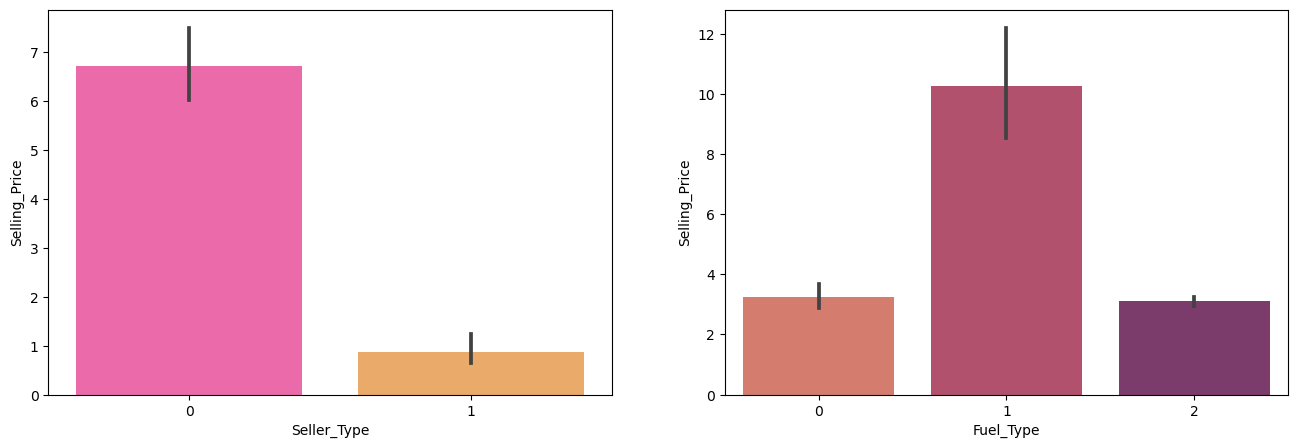

In [22]:
# Seller_Type and Fuel_Type
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(x='Seller_Type',y='Selling_Price',data=price_prdt_df,palette='spring')
plt.subplot(1,2,2)
sns.barplot(x='Fuel_Type',y='Selling_Price',data=price_prdt_df,palette='flare')

# Inference
The above bar plots depicts that cars having seller type as Dealer has more selling price and Individual has
less selling price . and cars having Diesel type of fuel has more selling price , Petrol and CNG fuel type has
less selling price.


<Axes: xlabel='Owner', ylabel='Selling_Price'>

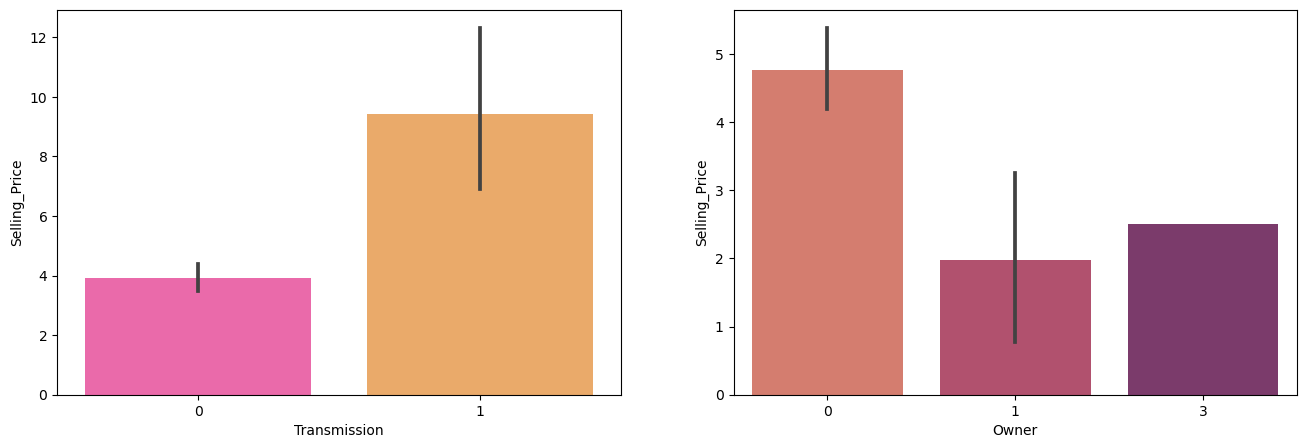

In [23]:
#Transmission and Owner
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(x='Transmission',y='Selling_Price',data=price_prdt_df,palette='spring')
plt.subplot(1,2,2)
sns.barplot(x='Owner',y='Selling_Price',data=price_prdt_df,palette='flare')

# Inference
The above bar plots depicts that Automatic cars has more selling price than manual cars. And cars of First
Owner has more selling price , than Second and Third Owner.

In [24]:
price_prdt_df['Age']=2023-price_prdt_df['Year']
price_prdt_df.head(5)

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price,Age
0,ritz,2014,5.59,27000,0,0,0,0,3.35,9
1,sx4,2013,9.54,43000,1,0,0,0,4.75,10
2,ciaz,2017,9.85,6900,0,0,0,0,7.25,6
3,wagon r,2011,4.15,5200,0,0,0,0,2.85,12
4,swift,2014,6.87,42450,1,0,0,0,4.60,9


# Inference
The age of all cars in the attribute "Car_Name" has been calulated. Wagon r car has maximun age from
above dataframe.

          Car_Name  Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
37             800  2003           2.28      127000          0            1   
50        fortuner  2012          30.61      104707          1            0   
53        fortuner  2013          30.61      135000          1            1   
77         corolla  2004          12.35      135154          0            0   
84          innova  2005          13.46      197176          1            0   
85           camry  2006          23.73      142000          0            1   
179  Honda Karizma  2010           1.05      213000          0            1   
196      Activa 3g  2008           0.52      500000          0            1   

     Transmission  Owner  Selling_Price  Age  
37              0      0           0.35   20  
50              1      0          14.90   11  
53              1      0          16.00   10  
77              1      0           1.50   19  
84              0      0           3.49   18  
85    

<Axes: >

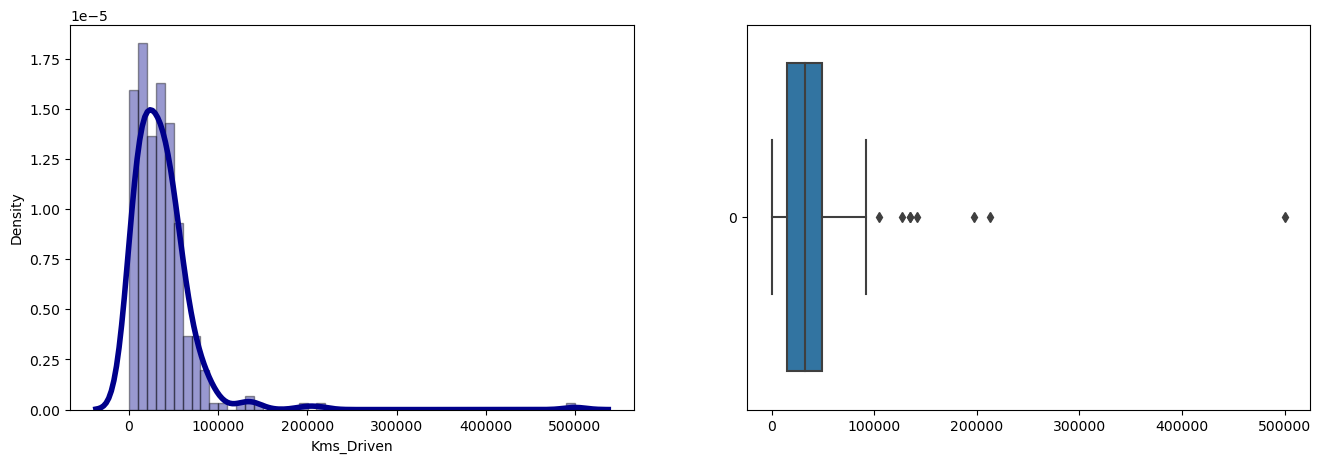

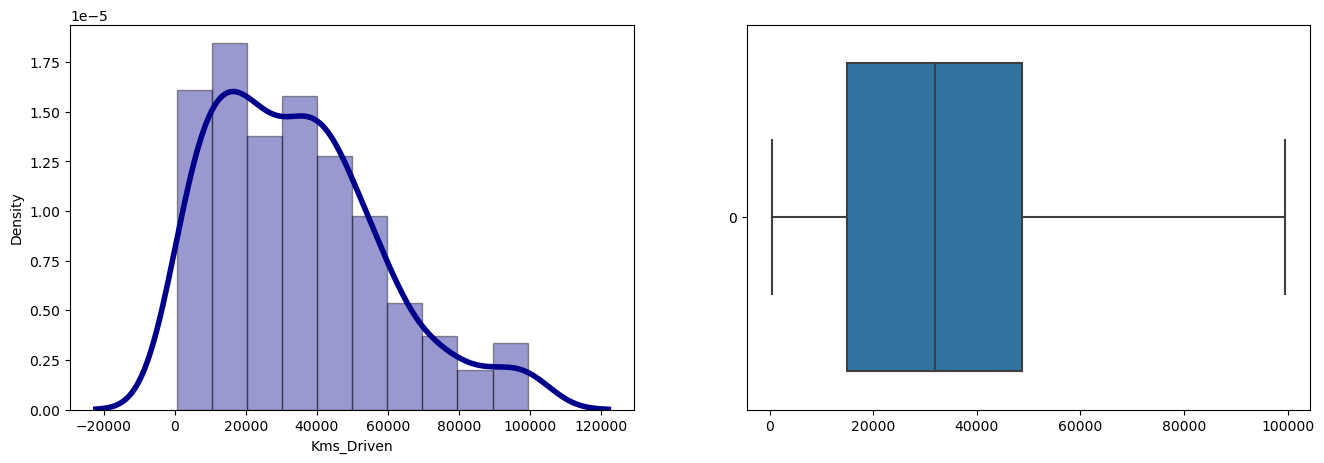

In [25]:
# Checking Presence of outliers..
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(price_prdt_df['Kms_Driven'],hist=True,kde=True,
             color='darkblue', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.subplot(1,2,2)
sns.boxplot(price_prdt_df['Kms_Driven'],orient='h')

# Finding Outliers..
percentile25 = price_prdt_df['Kms_Driven'].quantile(0.25)
percentile75 = price_prdt_df['Kms_Driven'].quantile(0.75)

iqr=percentile75-percentile25

upper_limit = percentile75+1.5*iqr
lower_limit = percentile25-1.5*iqr

print(price_prdt_df[price_prdt_df['Kms_Driven']>upper_limit])
print('\n')
print(price_prdt_df[price_prdt_df['Kms_Driven']<lower_limit])

# Capping Outliers...
price_prdt_df['Kms_Driven']=np.where(
    price_prdt_df['Kms_Driven']>upper_limit,upper_limit,
    np.where(price_prdt_df['Kms_Driven']<lower_limit,lower_limit,price_prdt_df['Kms_Driven']))

# Checking the capping of utliers... 
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(price_prdt_df['Kms_Driven'],hist=True,kde=True,
             color='darkblue', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.subplot(1,2,2)
sns.boxplot(price_prdt_df['Kms_Driven'],orient='h')

# Inference
We have seen before in histogram plot, there are outlires in the 'Kms_Driven'attibute. here outliers has been
treated using IQR method it clearly shows in the above box plots by comparing the plots before treating
outliers and after treating outliers. Skewness is decreased after trating outliers. It shows that most of the
cars travelled in a range between 20000 to 50000.

                Car_Name  Year  Present_Price  Kms_Driven  Fuel_Type  \
37                   800  2003           2.28     99417.5          0   
39                   sx4  2003           7.98     62000.0          0   
54                innova  2005          10.21     90000.0          0   
77               corolla  2004          12.35     99417.5          0   
84                innova  2005          13.46     99417.5          1   
92                innova  2005          13.70     75000.0          0   
189  Hero Super Splendor  2005           0.57     55000.0          0   

     Seller_Type  Transmission  Owner  Selling_Price  Age  
37             1             0      0           0.35   20  
39             0             0      0           2.25   20  
54             1             0      0           2.75   18  
77             0             1      0           1.50   19  
84             0             0      0           3.49   18  
92             0             0      0           3.51   18  
189

<Axes: >

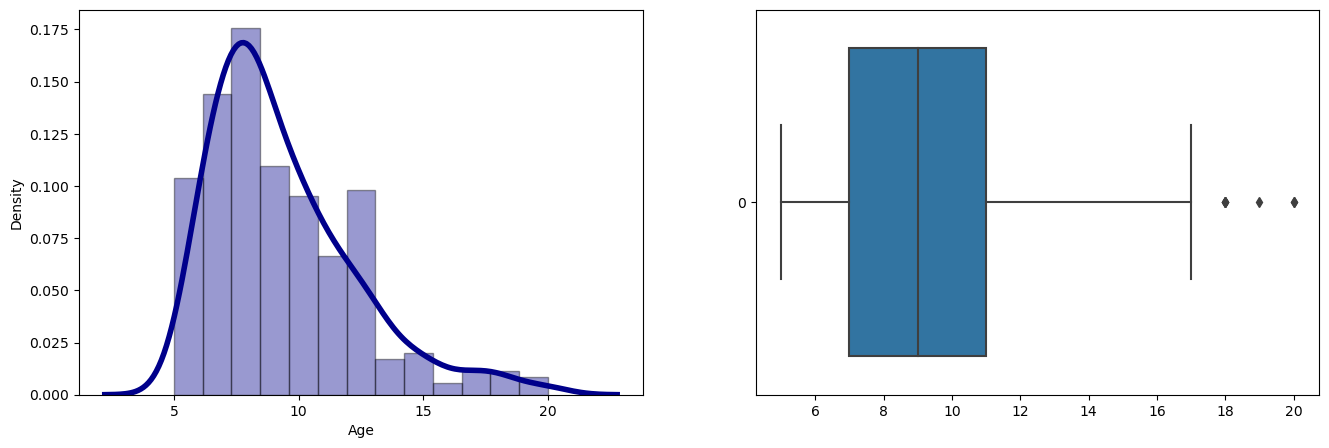

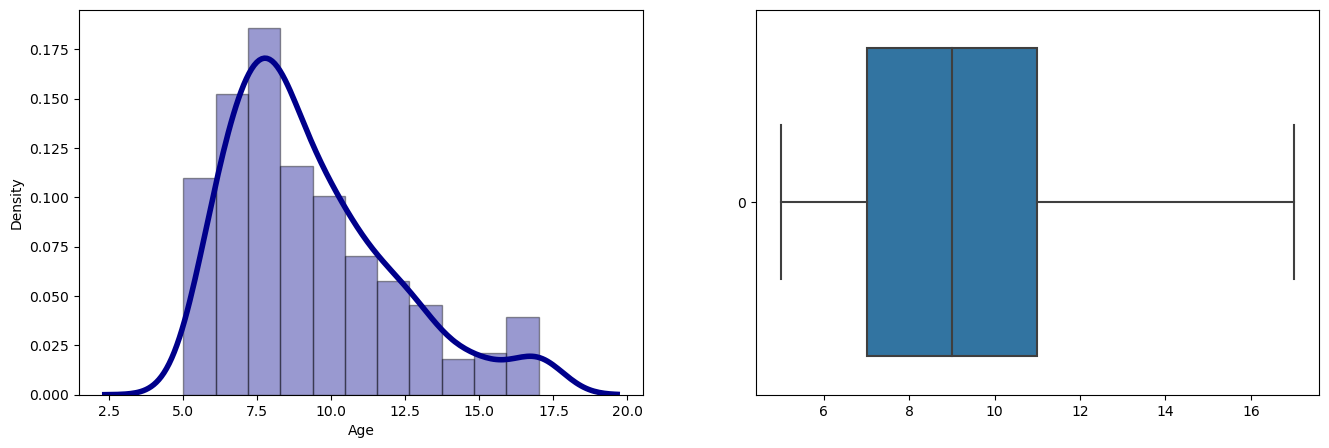

In [26]:
# Checking Presence of outliers..
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(price_prdt_df['Age'],hist=True,kde=True,
             color='darkblue', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.subplot(1,2,2)
sns.boxplot(price_prdt_df['Age'],orient='h')

# Finding Outliers..
percentile25 = price_prdt_df['Age'].quantile(0.25)
percentile75 = price_prdt_df['Age'].quantile(0.75)

iqr=percentile75-percentile25

upper_limit = percentile75+1.5*iqr
lower_limit = percentile25-1.5*iqr

print(price_prdt_df[price_prdt_df['Age']>upper_limit])
print('\n')
print(price_prdt_df[price_prdt_df['Age']<lower_limit])

# Capping Outliers...
price_prdt_df['Age']=np.where(
    price_prdt_df['Age']>upper_limit,upper_limit,
    np.where(price_prdt_df['Age']<lower_limit,lower_limit,price_prdt_df['Age']))

# Checking the capping of Outliers... 
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(price_prdt_df['Age'],hist=True,kde=True,
             color='darkblue', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.subplot(1,2,2)
sns.boxplot(price_prdt_df['Age'],orient='h')

# Inference
There are outlires in the 'Age 'attibute. Here outliers has been treated using IQR method. It clearly shows in
the above box plots by comparing the plots before treating outliers and after treating outliers. Skewness is
decreased after trating outliers. It shows that most of the cars Age in a range between 7 to 11.

In [27]:
price_prdt_df.corr()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price,Age
Year,1.000000,-0.047584,-0.640598,0.053643,-0.039896,-0.000394,-0.182104,0.236141,-0.995637
Present_Price,-0.047584,1.000000,0.356175,0.440415,-0.512030,0.348715,0.008057,0.878983,0.049444
Kms_Driven,-0.640598,0.356175,1.000000,0.280866,-0.269800,0.093247,0.092399,0.110696,0.639246
Fuel_Type,0.053643,0.440415,0.280866,1.000000,-0.352415,0.080466,-0.055705,0.509467,-0.051647
Seller_Type,-0.039896,-0.512030,-0.269800,-0.352415,1.000000,-0.063240,0.124269,-0.550724,0.039727
Transmission,-0.000394,0.348715,0.093247,0.080466,-0.063240,1.000000,0.050316,0.367128,-0.001024
Owner,-0.182104,0.008057,0.092399,-0.055705,0.124269,0.050316,1.000000,-0.088344,0.192740
Selling_Price,0.236141,0.878983,0.110696,0.509467,-0.550724,0.367128,-0.088344,1.000000,-0.238333
Age,-0.995637,0.049444,0.639246,-0.051647,0.039727,-0.001024,0.192740,-0.238333,1.000000


# Inference
The output depicts the matrix[9*9] shows the pairwise correlations between different variables in the dataset,
which provide insights into dependencies or collinearity among the variables.Though this We can declare
that correaltion between the Selling_Price and Present_Price is high i.e 0.878983. The correaltion between
Present price and Owner is low ie 0 008057

<Axes: >

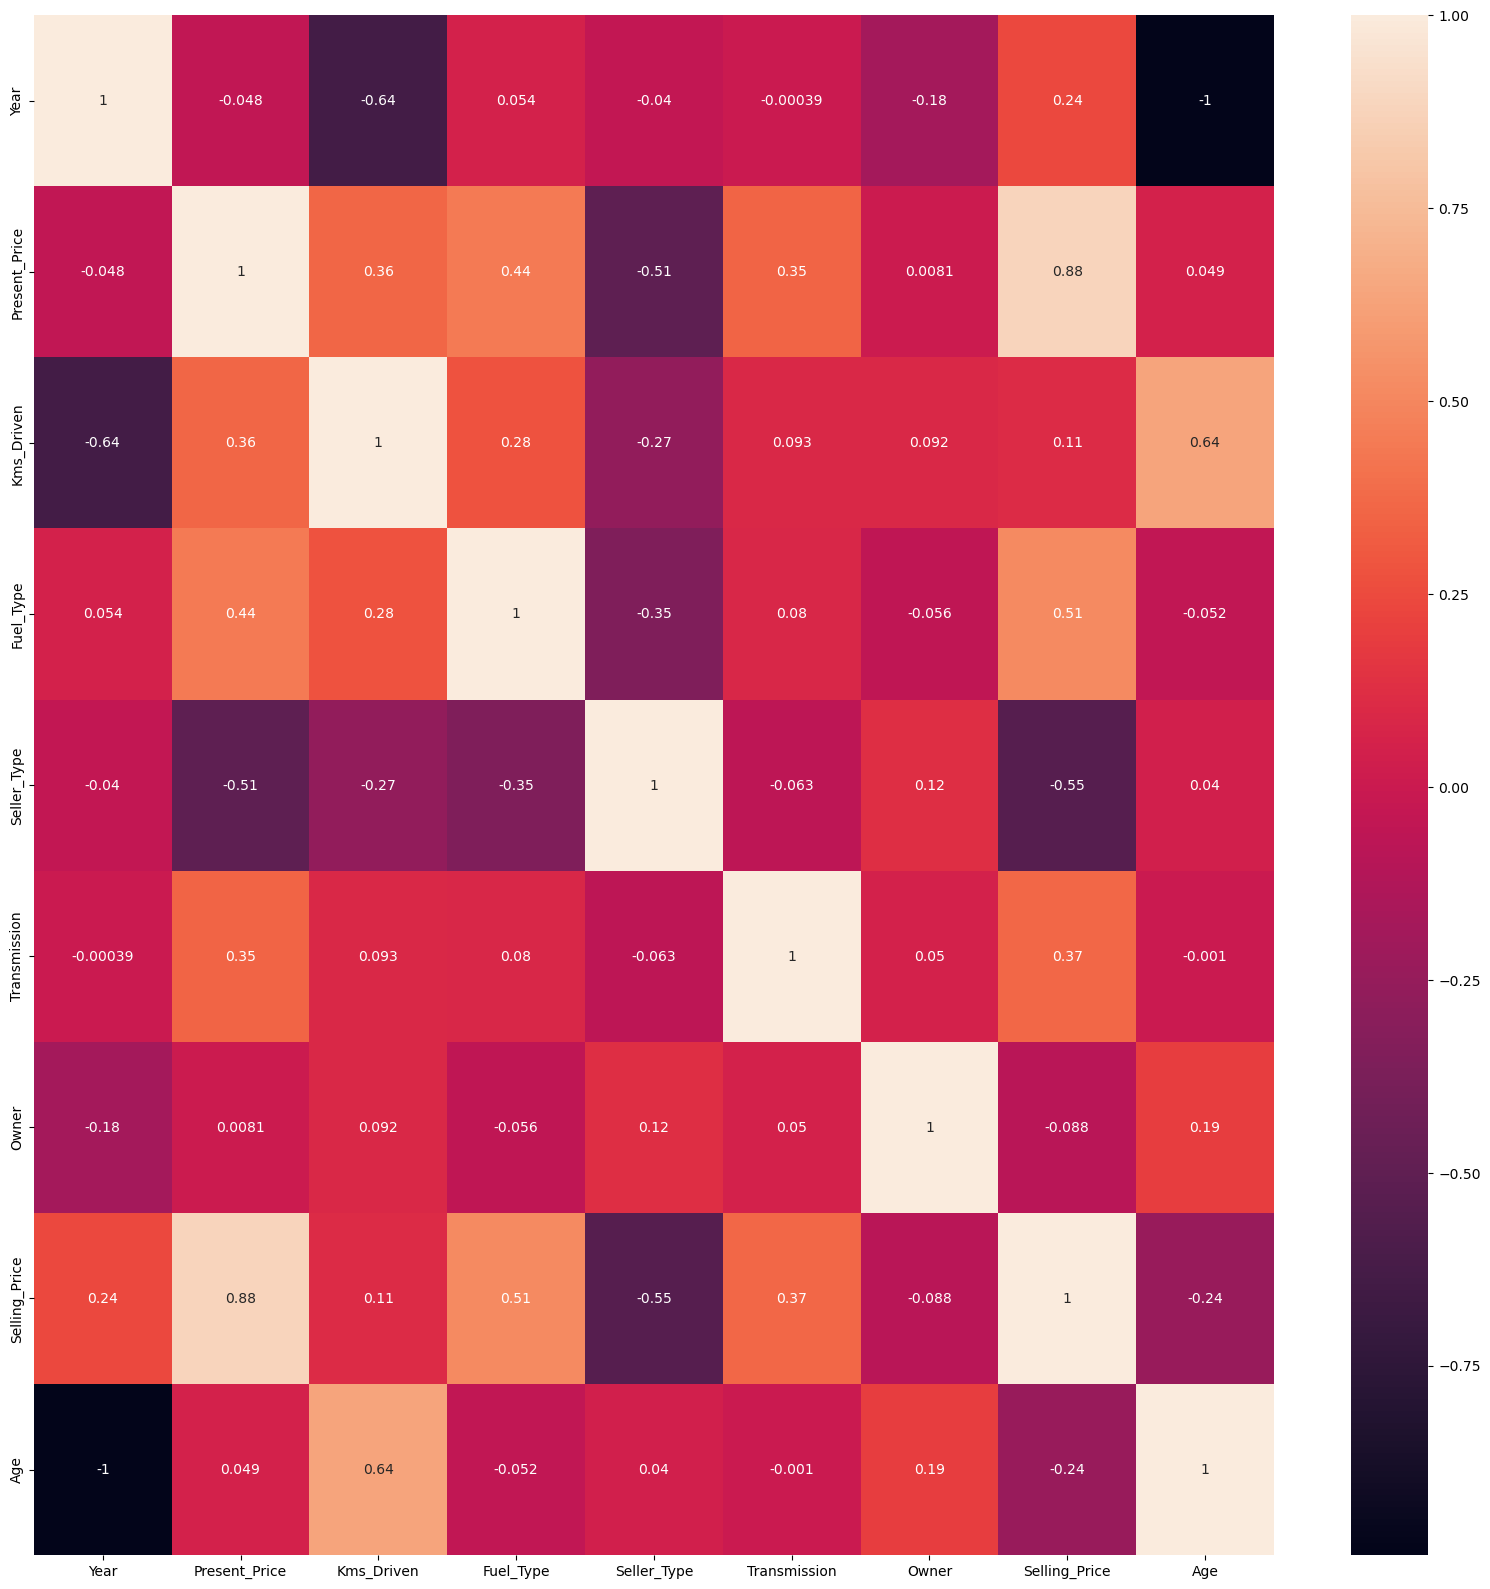

In [28]:
corrmat=price_prdt_df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

sns.heatmap(price_prdt_df[top_corr_features].corr(),annot=True)

<Axes: xlabel='Age', ylabel='Selling_Price'>

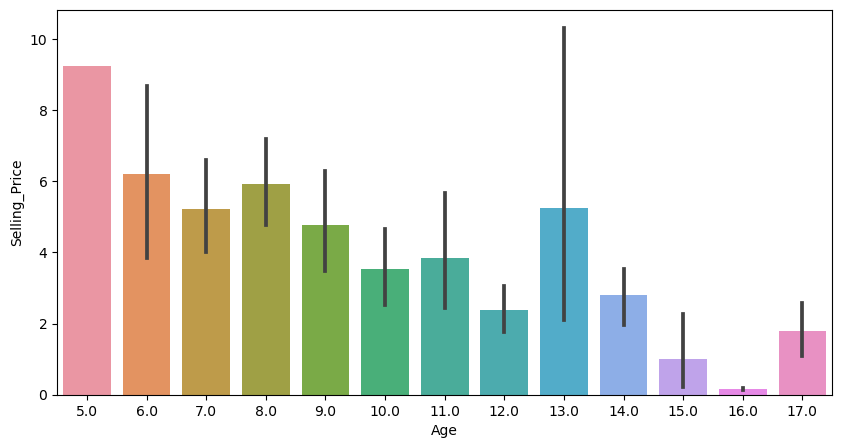

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='Age',y='Selling_Price',data=price_prdt_df)

## Inference
The Output depicts that Cars of age between 0 to 5 has high selling price,whereas Cars of age 16 has less
selling price. We got this output after treating outliers.
 

In [30]:
prediction_set=price_prdt_df[['Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner','Age','Selling_Price']]

In [31]:
prediction_set.sample(10)

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Selling_Price
78,22.83,80000.0,0,0,1,0,13.0,5.25
39,7.98,62000.0,0,0,0,0,17.0,2.25
267,9.40,19434.0,1,0,0,0,7.0,8.35
291,6.10,31427.0,0,0,0,0,8.0,5.40
143,0.84,25000.0,0,1,0,0,7.0,0.60
23,3.46,45280.0,0,0,0,0,9.0,2.50
225,4.60,22517.0,0,0,0,0,12.0,2.70
26,5.87,55138.0,0,0,0,0,10.0,4.15
176,1.05,30000.0,0,1,0,0,12.0,0.35
157,0.84,23000.0,0,1,0,0,8.0,0.48


# Inference
Here a new dataframe (prediction_set) has been cereated which contains the required attributes such as
Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Selling_Price along with its 10
instances.

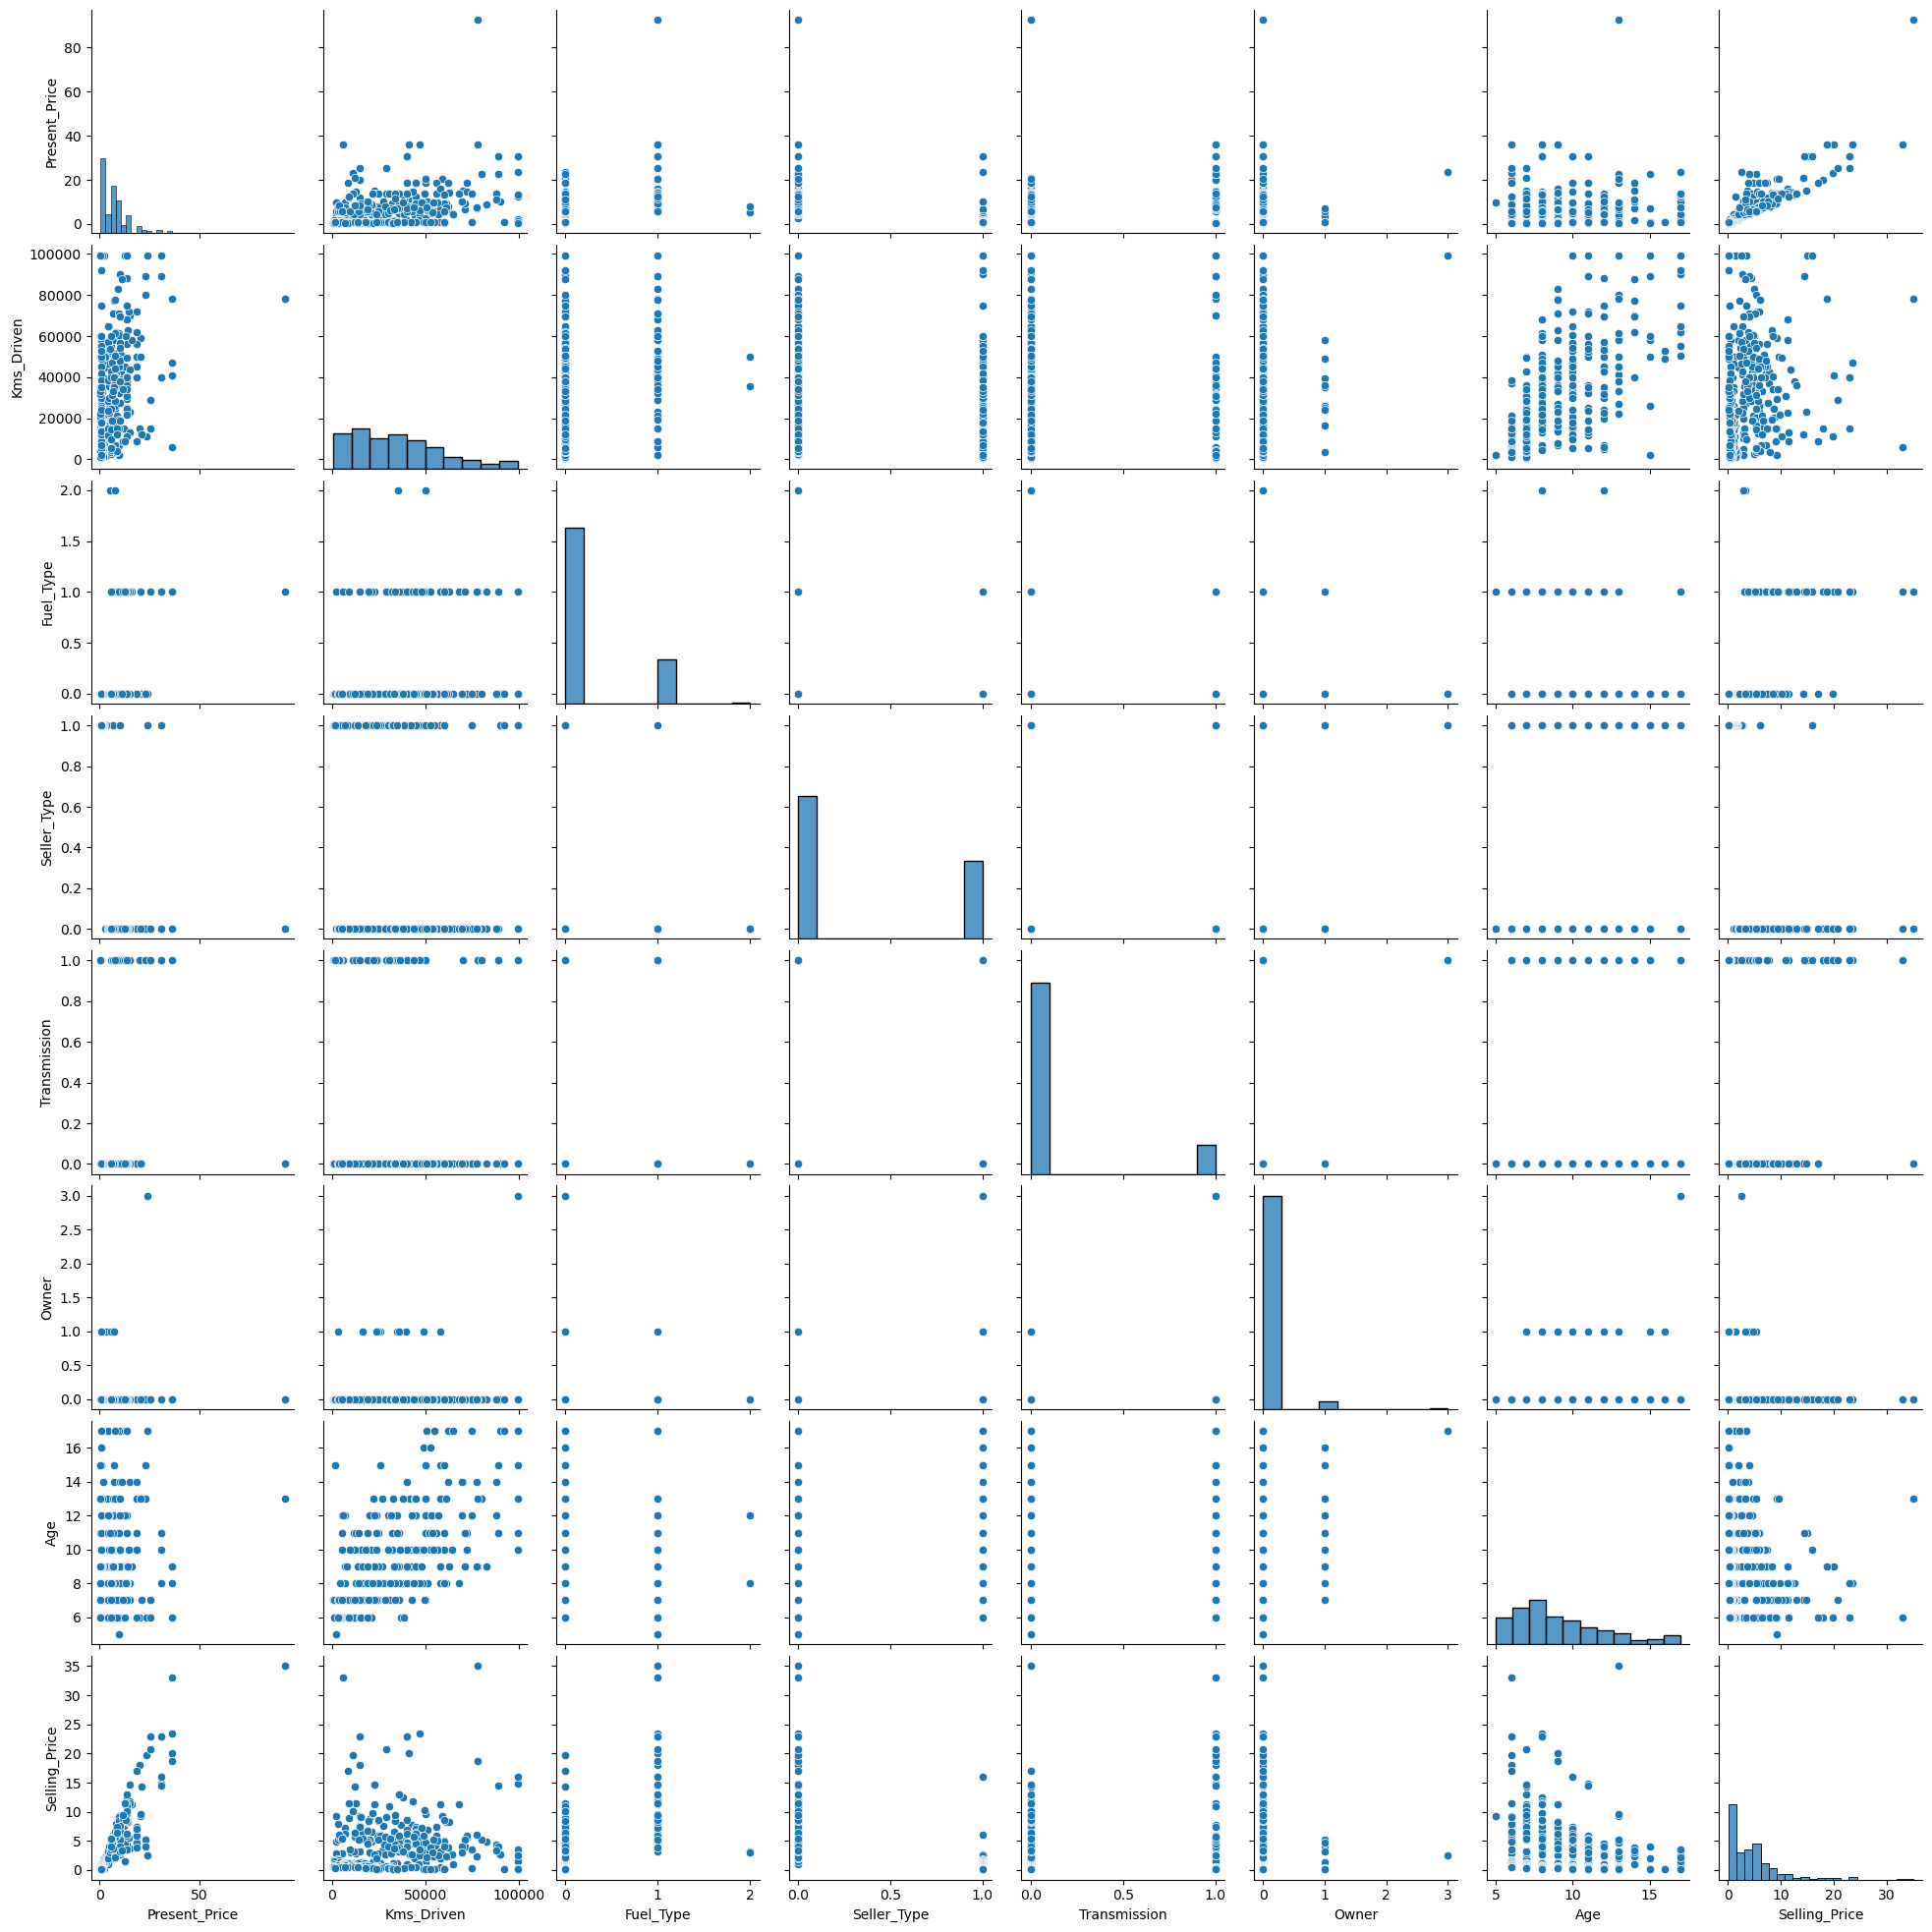

In [32]:
sns.pairplot(prediction_set)

# Inference
The Output depicts that creation a grid of scatter plots and histograms for visualizing pairwise relationships
among variables in the prediction_set DataFrame.


# MODEL BUILDING

In [33]:
X = pd.DataFrame(price_prdt_df, columns = ['Age','Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])
y = pd.DataFrame(price_prdt_df['Selling_Price'])

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

In [35]:
model = LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

In [36]:
Y_pred = model.predict(X_test)

In [37]:
model.intercept_

array([5.06418856])

In [38]:
model.coef_

array([[-3.05975485e-01,  4.43336178e-01, -2.55923018e-05,
         1.66515320e+00, -1.43678230e+00,  1.35312487e+00,
        -8.93170463e-01]])

In [39]:
print("Mean Absolute Error     : ", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error      : ", metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R2 Score                : ", metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error     :  1.1707795167416224
Mean Squared Error      :  2.925944340239779
Root Mean Squared Error :  1.7105391957624878
R2 Score                :  0.886174631036218
